# Codecademy Portfolio Project: Biodiversity in National Parks

# Introduction

The Syllabus of the Codecademy Data Science Skillpath offers the possibility to complete an exercise with the goal of applying methods of Descriptive Analysis on the question of interpreting data from the National Parks Service about endangered species in different parks and to investigate if there are any patterns or themes to the types of species that become endangered.

The data was provided in two seperate csv-files, one containing the scientific name of the species that was observed, the park it was observed in, as well as the observations. The second file contained the scientific as well as the common name, the conservation status of the species and the taxonomy class it belonged to.

After downloading and merging the two files, I used a groupby to join observations, looked at the range and dispersion of observations regarding different parks and categorys (classes). This was done using violinplots, as they reveal the rough distribution of the observations.
A stacked bar-chart and pie charts were used to get a rough idea, how the species, which had a conservation status were distributed among the statuses, based on their category (class).
A quick internet research(wikipedia) was conducted into the different species, if there was a pattern among the order (subclasses) affected, but given that this was not the case, any further investigation into meaningfull patterns, was deamed not viable.

# Analysis

Goal:

 - Interpret data from the National Parks Service about endangered species in different parks
 - Investigate if there are any patterns or themes to the types of species that become endangered.

Provided Resources:

 - observations.csv
 - species_info.csv

In [1]:
# import section ------------------------------------------------------------------------------------------------------------- #
# updated with progress, sorted by purpose of the library -------------------------------------------------------------------- #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set notebook options ------------------------------------------------------------------------------------------------------- #
pd.options.display.max_rows = 4000
pd.options.display.max_seq_items = 4000

Loading the provided csv-files and taking a look at them to get an overview over the provided data.

In [2]:
# read provided "observations.csv" as pandas dataframe and assign it to a variable ------------------------------------------- #
observations_df = pd.read_csv("./CC_provided_resources/observations.csv")

observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
# print first 10 rows of "observations.csv" ---------------------------------------------------------------------------------- #
observations_df.head(10)

scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7            39  
8           168  
9           250

In [4]:
# read provided "species_info.csv" as pandas dataframe and assign it to a variable ------------------------------------------- #
species_info_df = pd.read_csv("./CC_provided_resources/species_info.csv")

species_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
# print first 10 rows of "species_info.csv" ---------------------------------------------------------------------------------- #
species_info_df.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
5                                  White-Tailed Deer                 NaN  
6                                Feral Hog, Wild Pig                 NaN  
7                                             Coyote  Species of Concern  
8                                          Gray Wolf          Endangered  
9                                           Red Wolf          Endangered

Initial insights:
 - The dataframes need to be joined with an inner join on "scientific_name" column.
 - Need to check unique entries in both "scientific_name" columns beforehand, wether or not, there is a mismatch.
 - Check data-type of "NaN" values, replace with "null" type if needed.
 - Check text columns data-type, convert dtype to string.
 - Causal questions will be raised further into the analysis, because of unfamiliarity with the subject.

In [6]:
# replacing ambigious labels ------------------------------------------------------------------------------------------------- #
species_info_df.replace({"Gray Wolf, Wolf":"Gray Wolf"}, inplace=True)

common_unique = species_info_df["common_names"].unique()
print(list(common_unique))

["Gapper's Red-Backed Vole", 'American Bison, Bison', 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle', 'Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)', 'Wapiti Or Elk', 'White-Tailed Deer', 'Feral Hog, Wild Pig', 'Coyote', 'Gray Wolf', 'Red Wolf', 'Common Gray Fox, Gray Fox', 'Black Fox, Cross Fox, Red Fox, Silver Fox', 'Red Fox', 'Mountain Lion', 'Wild Cat, Wildcat', 'Bobcat', 'Panther (Mountain Lion)', 'Striped Skunk', 'Eastern Spotted Skunk', 'River Otter', 'Northern River Otter', 'Fisher', 'Mink (Or Weasel)', 'Long-Tailed Weasel', 'Least Weasel', 'Mink', 'Common Raccoon, Raccoon', 'Black Bear', "Rafinesque's Big-Eared Bat", 'Big Brown Bat', 'Silver-Haired Bat', 'Eastern Red Bat, Red Bat', 'Hoary Bat', 'Mississippi Myotis, Southeastern Myotis', 'Gray Myotis', "Keen's Myotis", 'Eastern Small-Footed Bat, Eastern Small-Footed Myotis', 'Little Brown Bat, Little Brown Myotis', 'Northern Long-Eared Bat, Northern Myotis', 'Indiana Bat, Indiana Or Social Myotis', 'Eveni

In [7]:
# print unique entries (and count thereof) for "scientific_name" to check if mismatches occur with inner_join ---------------- #
obs_unique = observations_df["scientific_name"].unique()
obs_nunique = observations_df["scientific_name"].nunique()
obs_sorted = np.sort(obs_unique)
print(obs_sorted)
print(obs_nunique)

['Abies bifolia' 'Abies concolor' 'Abies fraseri' ...
 'Zonotrichia querula' 'Zygodon viridissimus'
 'Zygodon viridissimus var. rupestris']
5541


In [8]:
# print unique entries (and count thereof) for "scientific_name" to check if mismatches occur with inner_join ---------------- #
info_unique = species_info_df["scientific_name"].unique()
info_nunique = species_info_df["scientific_name"].nunique()
info_sorted = np.sort(info_unique)
print(info_sorted)
print(info_nunique)

['Abies bifolia' 'Abies concolor' 'Abies fraseri' ...
 'Zonotrichia querula' 'Zygodon viridissimus'
 'Zygodon viridissimus var. rupestris']
5541


In [9]:
# above output suggests, there will not be a mismatch, still performing a full comparison ------------------------------------ #
if np.array_equal(obs_sorted ,info_sorted):
    print("They are identical!")
else:
    print("They are NOT identical!")

They are identical!


As both sorted arrays are identical, it can be concluded that an inner join_can be performed and there will not be a loss of data. (Or in case of an outer_join, there will be no rows with missing values.)

In [10]:
# joining observations.csv and species_info.csv on "scientific_name" columns ------------------------------------------------- #
all_data_df = observations_df.merge(species_info_df, on="scientific_name", how="inner")
all_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


Beeing unfamiliar with the subject I will perform an exploratory analysis, to get an idea what type of relations one might want to look for.
Beforehand, I will convert columns with text-values to string for ease of use.

In [11]:
# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
all_data_df = all_data_df.astype(
{"scientific_name":"string", "park_name":"string", "category":"string", "common_names":"string", "conservation_status":"string"}
)

# fill null-values in conservation_status with "None" ------------------------------------------------------------------------ #
all_data_df.conservation_status.fillna(value="None", inplace=True)

all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  string
 1   park_name            25632 non-null  string
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  string
 4   common_names         25632 non-null  string
 5   conservation_status  25632 non-null  string
dtypes: int64(1), string(5)
memory usage: 1.4 MB


In [12]:
# Checking if there is more than one set of observations per scientific_name and park ---------------------------------------- #
common_names_unique = all_data_df["common_names"].unique()
park_name_unique = all_data_df["park_name"].unique()
double_entries_lst = list()

for name in common_names_unique:
    for park in park_name_unique:
        entries_returned = all_data_df[(all_data_df.common_names == name) & (all_data_df.park_name == park)]
        if len(entries_returned.index) > 1:
            double_entries_lst.append(True)
        else:
            double_entries_lst.append(False)

if True not in double_entries_lst:
    print("Observations per park and species are not split over multiple rows.")
else:
    print("Observations per park and species are split over multiple rows and need to be  merged, for ease of use.")

Observations per park and species are split over multiple rows and need to be  merged, for ease of use.


In [13]:
# merging rows containing observations with otherwise identical values, using groupby ---------------------------------------- #
all_data_df = all_data_df.groupby(by=["scientific_name", "park_name", "common_names", "category", "conservation_status"]).observations.sum().reset_index()
all_data_df = pd.DataFrame(all_data_df)

To get a general overview I will look at the distribution of the "conservation_status" across, "park_name" and "category". As well as look at the distribution of observations for different "conservation_status" levels.


In [14]:
# total number of categories for some of the metrics ------------------------------------------------------------------------- #

# Parks encompased by the dataframe ------------------------------------------------------------------------------------------ #
print("")
print("Parks encompased by the dataframe:")
print(all_data_df["park_name"].unique())

# Categories of animals encompased by the dataframe -------------------------------------------------------------------------- #
print("")
print("Categories of animals encompased by the dataframe:")
print(all_data_df["category"].unique())

# list of all conservation_status -------------------------------------------------------------------------------------------- #
print("")
print("Conservation_status:")
print(all_data_df["conservation_status"].unique())

# Unique species ------------------------------------------------------------------------------------------------------------- #
print("")
print("Unique species in 'all_data_df':")
print(all_data_df["scientific_name"].nunique())




Parks encompased by the dataframe:
<StringArray>
[                'Bryce National Park', 'Great Smoky Mountains National Park',
           'Yellowstone National Park',              'Yosemite National Park']
Length: 4, dtype: string

Categories of animals encompased by the dataframe:
<StringArray>
[   'Vascular Plant', 'Nonvascular Plant',              'Bird',
         'Amphibian',           'Reptile',            'Mammal',
              'Fish']
Length: 7, dtype: string

Conservation_status:
<StringArray>
['None', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']
Length: 5, dtype: string

Unique species in 'all_data_df':
5541


In [15]:
# subsets of "all_data_df" for each park ------------------------------------------------------------------------------------- #
park_gsm_df = all_data_df.loc[all_data_df.park_name == "Great Smoky Mountains National Park"]
park_yosemite_df = all_data_df.loc[all_data_df.park_name == "Yosemite National Park"]
park_yellowstone_df = all_data_df.loc[all_data_df.park_name == "Yellowstone National Park"]
park_bryce_df = all_data_df.loc[all_data_df.park_name == "Bryce National Park"]

# subsets of "all_data_df" for each animal category -------------------------------------------------------------------------- #
category_vasc_plant_df = all_data_df.loc[all_data_df.category == "Vascular Plant"]
category_nonvasc_plant_df = all_data_df.loc[all_data_df.category == "Nonvascular Plant"]
category_mammal_df = all_data_df.loc[all_data_df.category == "Mammal"]
category_bird_df = all_data_df.loc[all_data_df.category == "Bird"]
category_amphibian_df = all_data_df.loc[all_data_df.category == "Amphibian"]
category_reptile_df = all_data_df.loc[all_data_df.category == "Reptile"]
category_fish_df = all_data_df.loc[all_data_df.category == "Fish"]

# variables for plotting ----------------------------------------------------------------------------------------------------- #
order = ['None', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']

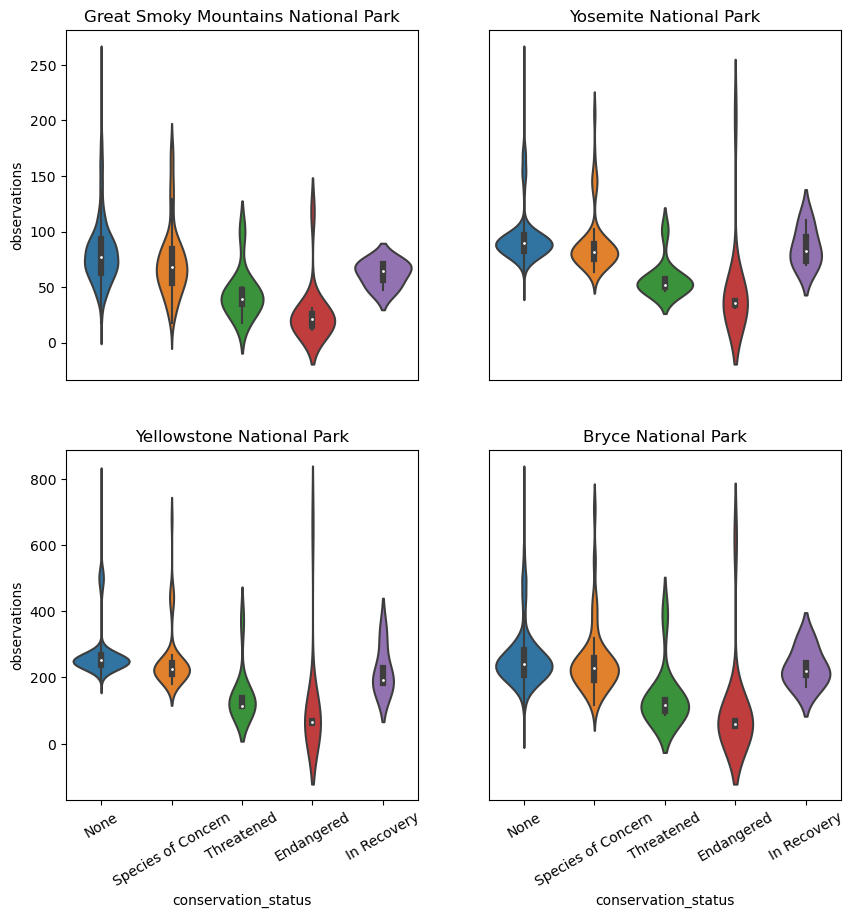

In [16]:
# violinplots to visualize wether or not there is a pattern in conservation_status, by park or category ---------------------- #
"""
Although violinplots do, because of the use of a kernel density estimator, often display a shape, that diverges from the actual
measured observations, and for example display negative values, albeit there not beeing negative observations, I decided on 
keeping the y-axis, ticks and labels, just to give the reader a rough idea of the numbers
"""

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
sns.violinplot(data=park_gsm_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Great Smoky Mountains National Park")
plt.xlabel("")
plt.xticks(ticks=[], rotation=30)

ax = fig.add_subplot(2, 2, 2)
sns.violinplot(data=park_yosemite_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Yosemite National Park")
plt.xlabel("")
plt.xticks(ticks=[], rotation=30)
plt.ylabel("")
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 2, 3)
sns.violinplot(data=park_yellowstone_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Yellowstone National Park")
plt.xticks(rotation=30)

ax = fig.add_subplot(2, 2, 4)
sns.violinplot(data=park_bryce_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Bryce National Park")
plt.xticks(rotation=30)
plt.ylabel("")
plt.yticks(ticks=[])

plt.show()

<Figure size 640x480 with 0 Axes>

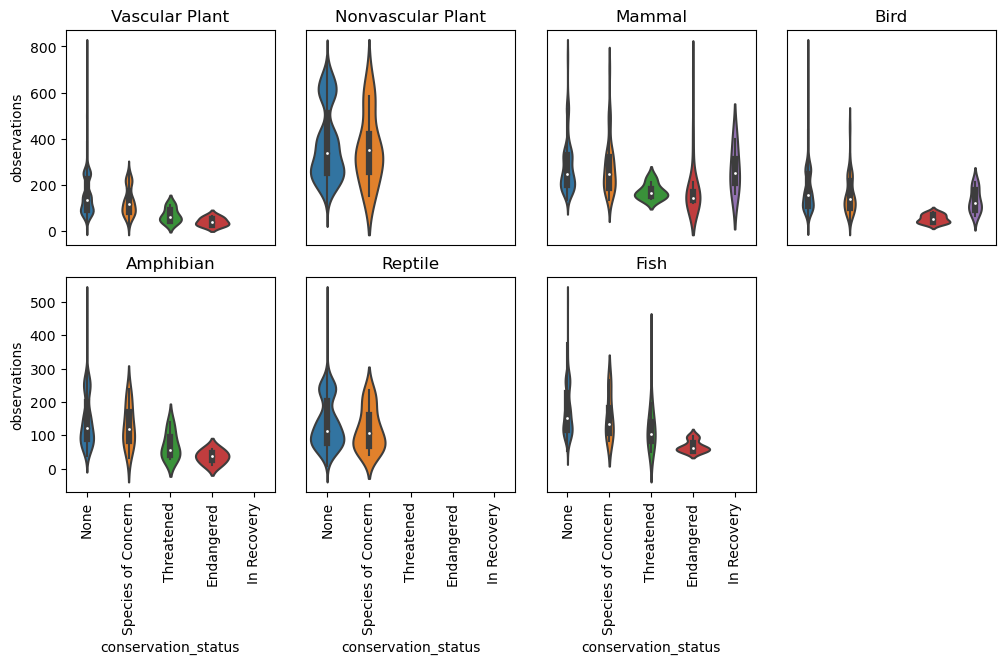

In [17]:
# violinplots to visualize wether or not there is a pattern in conservation_status, by park or category ---------------------- #
"""
Although violinplots do, because of the use of a kernel density estimator, often display a shape, that diverges from the actual
measured observations, and for example display negative values, albeit there not beeing negative observations, I decided on 
keeping the y-axis, ticks and labels, just to give the reader a rough idea of the numbers
"""
plt.clf()

fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0.15, wspace=0.15)

ax = fig.add_subplot(2, 4, 1)
sns.violinplot(data=category_vasc_plant_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Vascular Plant")
plt.xlabel("")
plt.xticks(ticks=[])

ax = fig.add_subplot(2, 4, 2)
sns.violinplot(data=category_nonvasc_plant_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Nonvascular Plant")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 3)
sns.violinplot(data=category_mammal_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Mammal")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 4)
sns.violinplot(data=category_bird_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Bird")
plt.xlabel("")
plt.ylabel("")
plt.xticks(ticks=[])
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 5)
sns.violinplot(data=category_amphibian_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Amphibian")
plt.xticks(rotation=90)

ax = fig.add_subplot(2, 4, 6)
sns.violinplot(data=category_reptile_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Reptile")
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks(ticks=[])

ax = fig.add_subplot(2, 4, 7)
sns.violinplot(data=category_fish_df, x="conservation_status", y="observations", order=order, ax=ax)
plt.title("Fish")
plt.ylabel("")
plt.xticks(rotation=90)
plt.yticks(ticks=[])

plt.show()

In [18]:
# count per category --------------------------------------------------------------------------------------------------------- #
park_count_df = all_data_df.groupby("park_name").count()

# entries per category into the database ------------------------------------------------------------------------------------- #
park_count_df.drop(columns=["category", "observations", "conservation_status"], inplace=True)
park_count_df.rename(columns={"scientific_name":"total_count"}, inplace=True)

# count of no_status and status for each category ---------------------------------------------------------------------------- #
park_count_df["no_status_count"] = all_data_df[all_data_df.conservation_status == "None"].groupby("park_name").count().scientific_name
park_count_df["status_count"] = all_data_df[all_data_df.conservation_status != "None"].groupby("park_name").count().scientific_name

# count for each individual status per category ------------------------------------------------------------------------------ #
park_count_df["concern_count"] = all_data_df[all_data_df.conservation_status == "Species of Concern"].groupby("park_name").count().scientific_name
park_count_df["threatened_count"] = all_data_df[all_data_df.conservation_status == "Threatened"].groupby("park_name").count().scientific_name
park_count_df["endangered_count"] = all_data_df[all_data_df.conservation_status == "Endangered"].groupby("park_name").count().scientific_name
park_count_df["recovery_count"] = all_data_df[all_data_df.conservation_status == "In Recovery"].groupby("park_name").count().scientific_name

# fill NaN-values in category_count_df with 0 -------------------------------------------------------------------------------- #
park_count_df.fillna(value=0, inplace=True)

# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
park_count_df = park_count_df.astype({"threatened_count":"int", "endangered_count":"int", "recovery_count":"int"})

park_count_df

total_count  common_names  \
park_name                                                        
Bryce National Park                         5823          5823   
Great Smoky Mountains National Park         5823          5823   
Yellowstone National Park                   5823          5823   
Yosemite National Park                      5823          5823   

                                     no_status_count  status_count  \
park_name                                                            
Bryce National Park                             5633           190   
Great Smoky Mountains National Park             5633           190   
Yellowstone National Park                       5633           190   
Yosemite National Park                          5633           190   

                                     concern_count  threatened_count  \
park_name                                                              
Bryce National Park                            161                10   
Great Smoky Mountains National Park            161                10   
Yellowstone National Park                      161                10   
Yosemite National Park                         161                10   

                                     endangered_count  recovery_count  
park_name                                                              
Bryce National Park                                15               4  
Great Smoky Mountains National Park                15               4  
Yellowstone National Park                          15               4  
Yosemite National Park                             15               4

There are entries for all species for each park, meaning park metrics, could be compared in relation to species observations.

Sizes of national parks in acres:
 - Yellowstone : 2,219,790.71
 - Yosemite : 761,747.50
 - Great Smokey Mountains : 522,426.88
 - Bryce Canyon : 35,835.08
 
Observations in relation to size for example, without delving a lot further into the specifics of each park etc., such metrics would be of limited value and such an approach would be more justified when trying to make a Generalized Regression Model for example.

In [19]:
# count per category --------------------------------------------------------------------------------------------------------- #
category_count_df = all_data_df.groupby("category").count()

# entries per category into the database ------------------------------------------------------------------------------------- #
category_count_df.drop(columns=["park_name", "observations", "common_names", "conservation_status"], inplace=True)
category_count_df.rename(columns={"scientific_name":"total_count"}, inplace=True)

# count of no_status and status for each category ---------------------------------------------------------------------------- #
category_count_df["no_status_count"] = all_data_df[all_data_df.conservation_status == "None"].groupby("category").count().scientific_name
category_count_df["status_count"] = all_data_df[all_data_df.conservation_status != "None"].groupby("category").count().scientific_name

# count for each individual status per category ------------------------------------------------------------------------------ #
category_count_df["concern_count"] = all_data_df[all_data_df.conservation_status == "Species of Concern"].groupby("category").count().scientific_name
category_count_df["threatened_count"] = all_data_df[all_data_df.conservation_status == "Threatened"].groupby("category").count().scientific_name
category_count_df["endangered_count"] = all_data_df[all_data_df.conservation_status == "Endangered"].groupby("category").count().scientific_name
category_count_df["recovery_count"] = all_data_df[all_data_df.conservation_status == "In Recovery"].groupby("category").count().scientific_name

# fill NaN-values in category_count_df with 0 -------------------------------------------------------------------------------- #
category_count_df.fillna(value=0, inplace=True)

# change data types of values in columns to be easier to work with ----------------------------------------------------------- #
category_count_df = category_count_df.astype({"threatened_count":"int", "endangered_count":"int", "recovery_count":"int"})

category_count_df

total_count  no_status_count  status_count  concern_count  \
category                                                                       
Amphibian                  320              292            28             16   
Bird                      2084             1768           316            288   
Fish                       508              464            44             16   
Mammal                     852              704           148            112   
Nonvascular Plant         1332             1312            20             20   
Reptile                    316              296            20             20   
Vascular Plant           17880            17696           184            172   

                   threatened_count  endangered_count  recovery_count  
category                                                               
Amphibian                         8                 4               0  
Bird                              0                16              12  
Fish                             16                12               0  
Mammal                            8                24               4  
Nonvascular Plant                 0                 0               0  
Reptile                           0                 0               0  
Vascular Plant                    8                 4               0

In [20]:
# get percentage values of category_count_df --------------------------------------------------------------------------------- #
category_perc_df = pd.DataFrame.copy(category_count_df)
cat_count_cols = category_perc_df.columns.values.tolist()

for col in cat_count_cols:
    category_perc_df[f"{col}_perc"] = np.round_(np.multiply(np.divide(category_perc_df[col], category_perc_df["total_count"]), 100), 2)

category_perc_df.drop(columns=cat_count_cols, inplace=True)


category_perc_df

total_count_perc  no_status_count_perc  status_count_perc  \
category                                                                       
Amphibian                     100.0                 91.25               8.75   
Bird                          100.0                 84.84              15.16   
Fish                          100.0                 91.34               8.66   
Mammal                        100.0                 82.63              17.37   
Nonvascular Plant             100.0                 98.50               1.50   
Reptile                       100.0                 93.67               6.33   
Vascular Plant                100.0                 98.97               1.03   

                   concern_count_perc  threatened_count_perc  \
category                                                       
Amphibian                        5.00                   2.50   
Bird                            13.82                   0.00   
Fish                             3.15                   3.15   
Mammal                          13.15                   0.94   
Nonvascular Plant                1.50                   0.00   
Reptile                          6.33                   0.00   
Vascular Plant                   0.96                   0.04   

                   endangered_count_perc  recovery_count_perc  
category                                                       
Amphibian                           1.25                 0.00  
Bird                                0.77                 0.58  
Fish                                2.36                 0.00  
Mammal                              2.82                 0.47  
Nonvascular Plant                   0.00                 0.00  
Reptile                             0.00                 0.00  
Vascular Plant                      0.02                 0.00

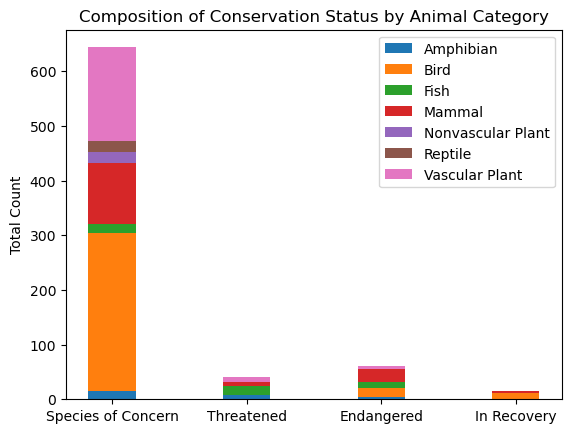

In [21]:
# list containing stacks ----------------------------------------------------------------------------------------------------- #
stacked_list = []

# Amphibian segments for stacked bar chart ----------------------------------------------------------------------------------- #
a_stack = list(category_count_df.iloc[0])
stacked_list.append(a_stack)

# Bird segments for bar chart ------------------------------------------------------------------------------------------------ #
b_stack = list(category_count_df.iloc[1])
stacked_list.append(b_stack)

# Fish segments for stacked bar chart ---------------------------------------------------------------------------------------- #
f_stack = list(category_count_df.iloc[2])
stacked_list.append(f_stack)

# Mammal segments for bar chart ---------------------------------------------------------------------------------------------- #
m_stack = list(category_count_df.iloc[3])
stacked_list.append(m_stack)

# Nonvascular Plant segments for bar chart ----------------------------------------------------------------------------------- #
n_stack = list(category_count_df.iloc[4])
stacked_list.append(n_stack)

# Reptile segments for bar chart --------------------------------------------------------------------------------------------- #
r_stack = list(category_count_df.iloc[5])
stacked_list.append(r_stack)

# Vascular Plant segments for bar chart -------------------------------------------------------------------------------------- #
v_stack = list(category_count_df.iloc[6])
stacked_list.append(v_stack)

# removing total_count and status count from stack lists --------------------------------------------------------------------- #
for lst in stacked_list:
    for i in range(3):
        lst.pop(0)

# stacked bar chart animals and conservation_status -------------------------------------------------------------------------- #
width = 0.35

fig, ax = plt.subplots()

labels = list(all_data_df["conservation_status"].unique())
labels.remove("None")

# bottoms of bar based on prev stacks ---------------------------------------------------------------------------------------- #
def lst_sum(l1, l2):
    new = [a+b for a, b in zip(l1, l2)]
    return new

a_top = a_stack
b_top = lst_sum(a_stack, b_stack)
f_top = lst_sum(b_top, f_stack)
m_top = lst_sum(f_top, m_stack)
n_top = lst_sum(m_top, n_stack)
r_top = lst_sum(n_top, r_stack)


ax.bar(labels, a_stack, width, bottom=0, label="Amphibian")
ax.bar(labels, b_stack, width, bottom=a_top, label="Bird")
ax.bar(labels, f_stack, width, bottom=b_top, label="Fish")
ax.bar(labels, m_stack, width, bottom=f_top, label="Mammal")
ax.bar(labels, n_stack, width, bottom=m_top, label="Nonvascular Plant")
ax.bar(labels, r_stack, width, bottom=n_top, label="Reptile")
ax.bar(labels, v_stack, width, bottom=r_top, label="Vascular Plant")

ax.set_ylabel("Total Count", rotation=90)
ax.set_title("Composition of Conservation Status by Animal Category")
ax.legend()

plt.show()

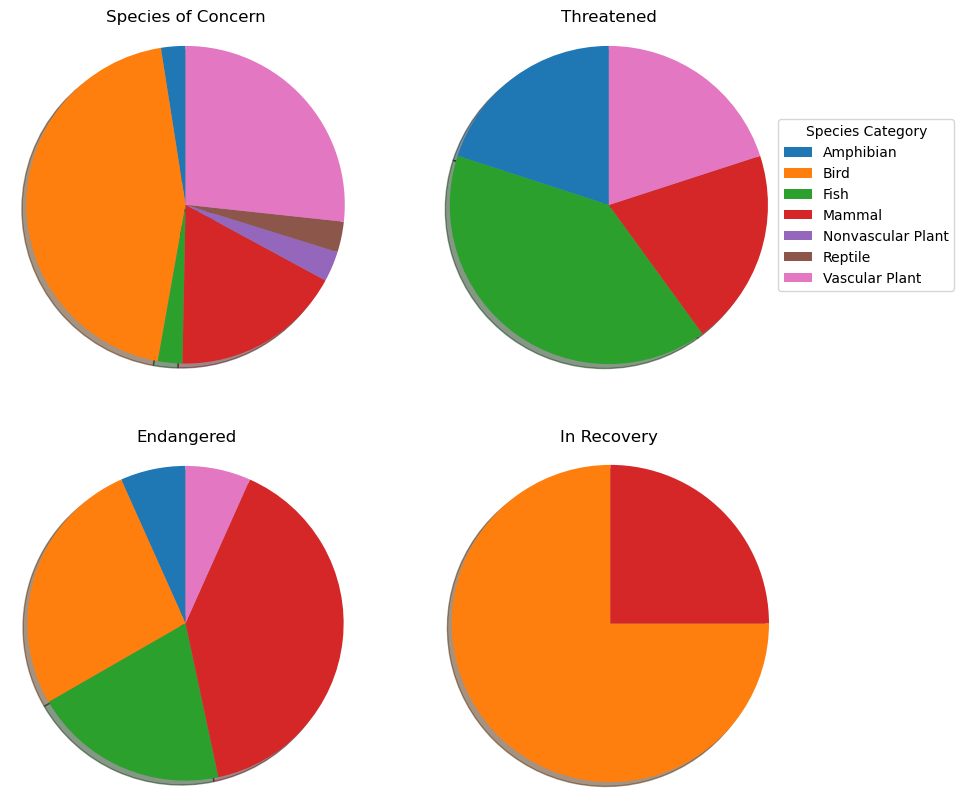

In [22]:
# pie_size lists for piechart ------------------------------------------------------------------------------------------------ #
concern_lst = list(category_count_df.concern_count)
threatened_lst = list(category_count_df.threatened_count)
endangered_lst = list(category_count_df.endangered_count)
recovery_lst = list(category_count_df.recovery_count)


# total count of endangered animals in endangered_lst ------------------------------------------------------------------------ #
labels = ['Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant', 'Amphibian', 'Reptile', 'Fish']
labels.sort()
#explode = (0, 0, 0, 0.1, 0, 0, 0)

# piecharts to visualize wether or not there is a pattern in conservation_status, by park or category ------------------------ #

fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(2, 2, 1)
ax.pie(concern_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("Species of Concern")

ax = fig.add_subplot(2, 2, 2)
ax.pie(threatened_lst, shadow=True, startangle=90)
ax.axis("equal")
ax.legend(labels, title="Species Category", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Threatened")

ax = fig.add_subplot(2, 2, 3)
ax.pie(endangered_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("Endangered")

ax = fig.add_subplot(2, 2, 4)
ax.pie(recovery_lst, shadow=True, startangle=90)
ax.axis("equal")
plt.title("In Recovery")

plt.show()

Given that our goal was to "Investigate if there are any patterns or themes to the types of species that become endangered.", we're going to take a closer look at the composition of species, with the status "Endangered".

In [23]:
# creating a DataFrame solely containing species with "consevation_status" "Endangered" -------------------------------------- #
endangered_df = all_data_df[all_data_df["conservation_status"] == "Endangered"]
endangered_df

scientific_name                            park_name  \
3352                    Canis lupus                  Bryce National Park   
3354                    Canis lupus  Great Smoky Mountains National Park   
3356                    Canis lupus            Yellowstone National Park   
3358                    Canis lupus               Yosemite National Park   
3360                    Canis rufus                  Bryce National Park   
3361                    Canis rufus  Great Smoky Mountains National Park   
3362                    Canis rufus            Yellowstone National Park   
3363                    Canis rufus               Yosemite National Park   
5020              Chasmistes liorus                  Bryce National Park   
5021              Chasmistes liorus  Great Smoky Mountains National Park   
5022              Chasmistes liorus            Yellowstone National Park   
5023              Chasmistes liorus               Yosemite National Park   
8508           Etheostoma percnurum                  Bryce National Park   
8509           Etheostoma percnurum  Great Smoky Mountains National Park   
8510           Etheostoma percnurum            Yellowstone National Park   
8511           Etheostoma percnurum               Yosemite National Park   
9512                  Geum radiatum                  Bryce National Park   
9513                  Geum radiatum  Great Smoky Mountains National Park   
9514                  Geum radiatum            Yellowstone National Park   
9515                  Geum radiatum               Yosemite National Park   
9592   Glaucomys sabrinus coloratus                  Bryce National Park   
9593   Glaucomys sabrinus coloratus  Great Smoky Mountains National Park   
9594   Glaucomys sabrinus coloratus            Yellowstone National Park   
9595   Glaucomys sabrinus coloratus               Yosemite National Park   
9728                 Grus americana                  Bryce National Park   
9729                 Grus americana  Great Smoky Mountains National Park   
9730                 Grus americana            Yellowstone National Park   
9731                 Grus americana               Yosemite National Park   
9748        Gymnogyps californianus                  Bryce National Park   
9749        Gymnogyps californianus  Great Smoky Mountains National Park   
9750        Gymnogyps californianus            Yellowstone National Park   
9751        Gymnogyps californianus               Yosemite National Park   
13932             Myotis grisescens                  Bryce National Park   
13933             Myotis grisescens  Great Smoky Mountains National Park   
13934             Myotis grisescens            Yellowstone National Park   
13935             Myotis grisescens               Yosemite National Park   
13960                Myotis sodalis                  Bryce National Park   
13961                Myotis sodalis  Great Smoky Mountains National Park   
13962                Myotis sodalis            Yellowstone National Park   
13963                Myotis sodalis               Yosemite National Park   
14244               Noturus baileyi                  Bryce National Park   
14245               Noturus baileyi  Great Smoky Mountains National Park   
14246               Noturus baileyi            Yellowstone National Park   
14247               Noturus baileyi               Yosemite National Park   
14660       Ovis canadensis sierrae                  Bryce National Park   
14661       Ovis canadensis sierrae  Great Smoky Mountains National Park   
14662       Ovis canadensis sierrae            Yellowstone National Park   
14663       Ovis canadensis sierrae               Yosemite National Park   
15864             Picoides borealis                  Bryce National Park   
15865             Picoides borealis  Great Smoky Mountains National Park   
15866             Picoides borealis            Yellowstone National Park   
15867             Picoides borealis               Yosemite National 

The order of organization of biological organisms, Taxonomy (https://en.wikipedia.org/wiki/Taxonomy_(biology)), is organized as follows:

Life -> Domain -> Kingdom -> Phylum -> Class -> Order -> Family -> Genus -> Species

Situated between Class ("category") and Species ("scientific_name"), Order might be suitable to identify a pattern in the endangered species, not visible in the Species or Class level of classification.

A quick research leads to the conclusion that the endangered animals, split into category, can be further split into the following Order:

- Amphibian:
 - Anura (frogs)
- Bird:
 - Gruiformes (crane_like)
 - Accipitriformes (hawks)
 - Piciformes (woodpeckers etc.)
 - Passerine (sparrows)
- Fish:
 - Cypriniformes (carp-like)
 - Perciformes (perch-like)
 - Siluriformes (catfish)
- Mammals:
 - Carnivores (cat-like, dog-like, flesh-eaters)
 - Rodentia (rodents)
 - Chiroptera (bats)
 - Artiodactyla (even-toed)
- Vascular Plant:
 - Rosales (order of flowering plants)
 
 To find any meaningfull pattern in the types of species that become endangered, a thorough research into the prefered environments, migration patterns, diets, changes in the environments etc. would be required. Given the obvious scope of this task and that the goal of this exercise for me is focused on the technical side of things, we'll stop here and summarize any notable findings so far.

# Conclusions

Patterns and themes that have been noticed:
 - The number of observations relativ to the status does have some overlaps and in some cases serious spread and / or outliers, but without further information on the species and or methology of observation and classification of conservation status, looking any further into it does not allow to draw any meaningfull conclusions.
 - Reptiles and Non - Vascular Plants don't seem to become endangered easiy.
 - Relative to the absolute amount of observed species categorys (Classes), the most likely to be in the endangered conservations status are:
  - Mammals:        2.82 %
  - Fish:           2.36 %
  - Bird:           0.77 %
  - Amphibian:      1.25 %
  - Vascular Plant: 0.02 %
  
 - The majority of species does not have a conservation status, the category with the most species having a conservation status is mammals with 17.37 % having a status.
 - It would obviously be easy to print out summary statistics on every dataframe and subset, but given that there is no striking pattern in the species that become endangered, I will spare the reader a headeche.
